In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Data_180m_wind.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52559 entries, 0 to 52558
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date/Time              52559 non-null  object 
 1   180m Wind Speed [m/s]  39351 non-null  float64
dtypes: float64(1), object(1)
memory usage: 821.4+ KB


In [4]:
df.isnull().sum()

Date/Time                    0
180m Wind Speed [m/s]    13208
dtype: int64

In [5]:
from sklearn.impute import KNNImputer
import pandas as pd

# Assuming 'df' is your DataFrame

n_neighbors = 5  # Number of neighbors to consider. Adjust based on your dataset size and characteristics

imputer = KNNImputer(n_neighbors=n_neighbors)
# It's recommended to normalize or standardize your data before using KNN imputation for better performance
# Here, we are imputing directly for simplicity
imputed_values = imputer.fit_transform(df[['180m Wind Speed [m/s]']])

# Replace the original column with the imputed values
df['180m Wind Speed [m/s]'] = imputed_values



In [6]:
df.isnull().sum()

Date/Time                0
180m Wind Speed [m/s]    0
dtype: int64

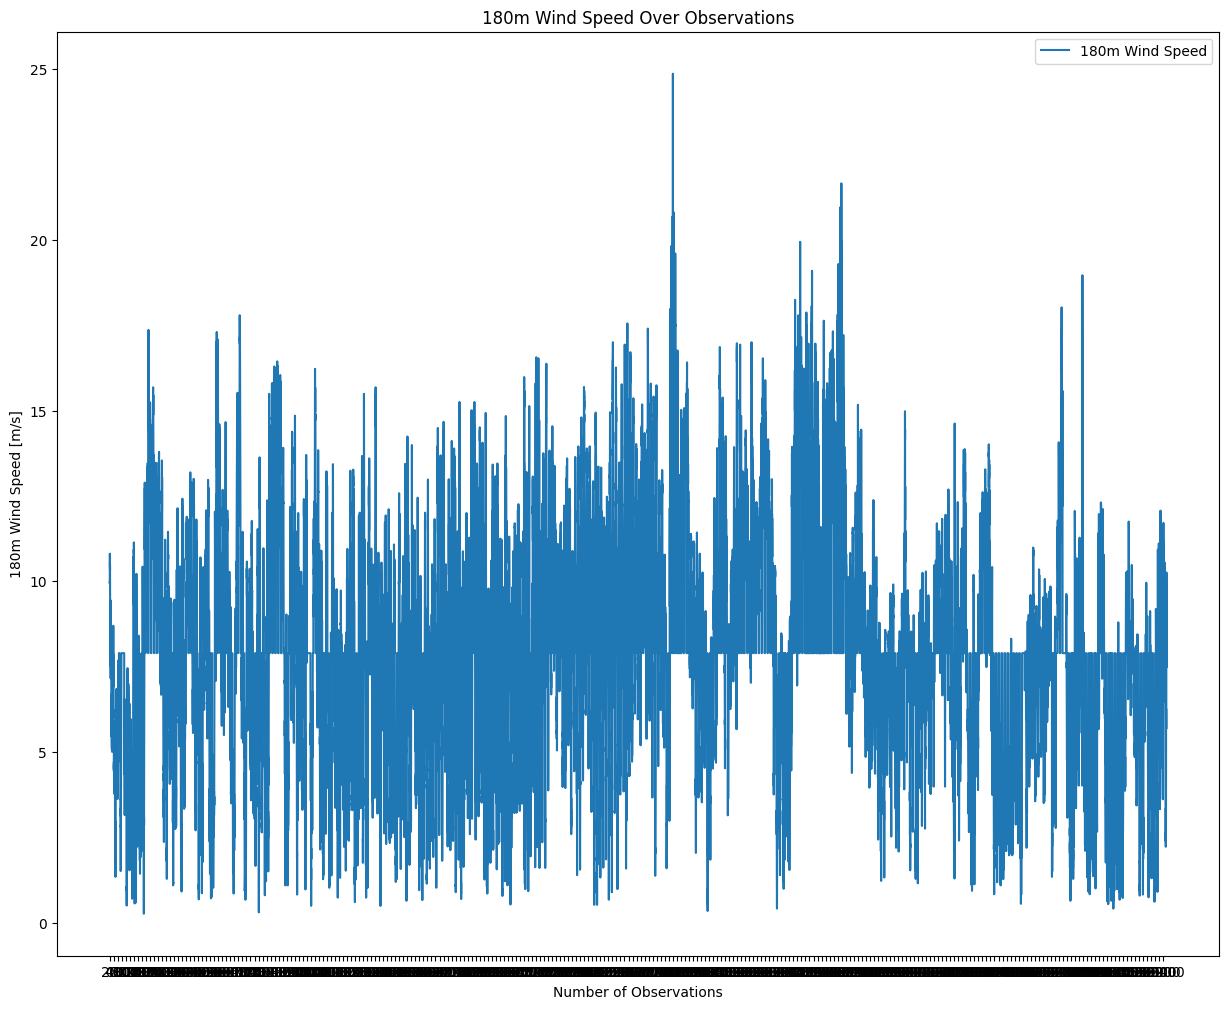

In [7]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and '180m Wind Speed [m/s]' is the column you're plotting

# Generate a sequence of integers for the x-axis based on the number of observations
x_values = range(len(df))

plt.figure(figsize=(15, 12))
plt.plot(x_values, df['180m Wind Speed [m/s]'], label='180m Wind Speed')

# Labeling the plot
plt.xlabel('Number of Observations')
plt.ylabel('180m Wind Speed [m/s]')
plt.title('180m Wind Speed Over Observations')

# Optionally, if you want to show specific scale intervals on the x-axis, you can set ticks
# For example, to set a tick every 200 observations:
plt.xticks(range(0, len(df)+1, 200))

plt.legend()
plt.savefig('windspeed_180m.png', dpi=300)
plt.show()


# **LSTM**

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error

# Sample data loading step
# df = pd.read_csv('your_data.csv')  # Make sure to load your dataset here

# Assuming '40m Wind Speed [m/s]' is the column you're interested in
data = df['180m Wind Speed [m/s]'].values.reshape(-1, 1)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split data into training and test sets in an 80:20 ratio
split_idx = int(len(data_scaled) * 0.8)
train, test = data_scaled[:split_idx, :], data_scaled[split_idx:, :]

# Function to create dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
model.fit(X_train, y_train, epochs=5, batch_size=2, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Calculate MAPE
mape_test = mean_absolute_percentage_error(y_test_inv.flatten(), test_predict.flatten()) * 100

print(f'Test MAPE: {mape_test:.4f}%')

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Calculate MAE
mae_test = mean_absolute_error(y_test_inv.flatten(), test_predict.flatten())
print(f'Test MAE: {mae_test:.4f}')

# Calculate RMSE
rmse_test = sqrt(mean_squared_error(y_test_inv.flatten(), test_predict.flatten()))
print(f'Test RMSE: {rmse_test:.4f}')

from sklearn.metrics import r2_score

# Calculate R^2 score for the test set
r2_test = r2_score(y_test_inv.flatten(), test_predict.flatten())
print(f'Test R^2 Score: {r2_test:.4f}')



Epoch 1/5
21023/21023 - 45s - loss: 0.0013 - 45s/epoch - 2ms/step
Epoch 2/5
21023/21023 - 42s - loss: 9.2425e-04 - 42s/epoch - 2ms/step
Epoch 3/5
21023/21023 - 41s - loss: 9.1980e-04 - 41s/epoch - 2ms/step
Epoch 4/5
21023/21023 - 40s - loss: 9.1319e-04 - 40s/epoch - 2ms/step
Epoch 5/5
21023/21023 - 40s - loss: 9.0933e-04 - 40s/epoch - 2ms/step
329/329 [==============================] - 1s 2ms/step
Test MAPE: 7.0050%
Test MAE: 0.3132
Test RMSE: 0.6184
Test R^2 Score: 0.9491


# **Bi-LSTM**

In [9]:
# prompt: give same code as above for bi lstm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
# Sample data loading step
# df = pd.read_csv('your_data.csv')  # Make sure to load your dataset here

# Assuming '40m Wind Speed [m/s]' is the column you're interested in
data = df['180m Wind Speed [m/s]'].values.reshape(-1, 1)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split data into training and test sets in an 80:20 ratio
split_idx = int(len(data_scaled) * 0.8)
train, test = data_scaled[:split_idx, :], data_scaled[split_idx:, :]

# Function to create dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, input_shape=(1, look_back))))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
model.fit(X_train, y_train, epochs=5, batch_size=2, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Calculate MAPE
mape_test = mean_absolute_percentage_error(y_test_inv.flatten(), test_predict.flatten()) * 100
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

# Assuming y_test_inv and test_predict are your actual and predicted values respectively and have been inverse transformed to their original scale

# Calculate MAE
mae_test = mean_absolute_error(y_test_inv.flatten(), test_predict.flatten())

# Calculate RMSE
rmse_test = sqrt(mean_squared_error(y_test_inv.flatten(), test_predict.flatten()))

# Calculate MAPE
mape_test = mean_absolute_percentage_error(y_test_inv.flatten(), test_predict.flatten()) * 100

print(f'Test MAE: {mae_test:.4f}')
print(f'Test RMSE: {rmse_test:.4f}')
print(f'Test MAPE: {mape_test:.4f}%')
from sklearn.metrics import r2_score

# Calculate R^2 score for the test set
r2_test = r2_score(y_test_inv.flatten(), test_predict.flatten())
print(f'Test R^2 Score: {r2_test:.4f}')



Epoch 1/5
21023/21023 - 53s - loss: 0.0012 - 53s/epoch - 3ms/step
Epoch 2/5
21023/21023 - 50s - loss: 9.3748e-04 - 50s/epoch - 2ms/step
Epoch 3/5
21023/21023 - 49s - loss: 9.2312e-04 - 49s/epoch - 2ms/step
Epoch 4/5
21023/21023 - 49s - loss: 9.2282e-04 - 49s/epoch - 2ms/step
Epoch 5/5
21023/21023 - 49s - loss: 9.1270e-04 - 49s/epoch - 2ms/step
329/329 [==============================] - 1s 2ms/step
Test MAE: 0.2611
Test RMSE: 0.6021
Test MAPE: 5.9011%
Test R^2 Score: 0.9517


# **GRU**

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Assuming 'df' is your DataFrame
data = df['180m Wind Speed [m/s]'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create dataset with look-back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split the data into training and testing sets
look_back = 1
X, Y = create_dataset(data_scaled, look_back)
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = Y[0:train_size], Y[train_size:len(Y)]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Build the GRU model
model = Sequential()
model.add(GRU(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=2, verbose=2)


# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions and actual values
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])


# Calculate MAE
mae = mean_absolute_error(y_test_inv.flatten(), test_predict.flatten())


# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test_inv.flatten(), test_predict.flatten()))

# Calculate MAPE
mape = np.mean(np.abs((y_test_inv.flatten() - test_predict.flatten()) / y_test_inv.flatten())) * 100

print(f'Test MAE: {mae:.4f}')
print(f'Test RMSE: {rmse:.4f}')
print(f'Test MAPE: {mape:.4f}%')

from sklearn.metrics import r2_score

# Calculate R^2 score for the test set
r2_test = r2_score(y_test_inv.flatten(), test_predict.flatten())
print(f'Test R^2 Score: {r2_test:.4f}')

Epoch 1/5
21023/21023 - 50s - loss: 0.0011 - 50s/epoch - 2ms/step
Epoch 2/5
21023/21023 - 47s - loss: 9.3140e-04 - 47s/epoch - 2ms/step
Epoch 3/5
21023/21023 - 50s - loss: 9.2130e-04 - 50s/epoch - 2ms/step
Epoch 4/5
21023/21023 - 48s - loss: 9.1634e-04 - 48s/epoch - 2ms/step
Epoch 5/5
21023/21023 - 48s - loss: 9.1119e-04 - 48s/epoch - 2ms/step
329/329 [==============================] - 1s 2ms/step
Test MAE: 0.3249
Test RMSE: 0.6253
Test MAPE: 7.0092%
Test R^2 Score: 0.9479


# **Stacked LSTM**

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Assuming 'df' is your DataFrame
data = df['180m Wind Speed [m/s]'].values.reshape(-1,1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create dataset with look-back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split data into training and testing
look_back = 1
X, Y = create_dataset(data_scaled, look_back)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(50, return_sequences=False))  # Stacking another LSTM layer
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=2, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform for original scale
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Calculate MAE
mae = mean_absolute_error(y_test_inv.flatten(), test_predict.flatten())
print(f'MAE: {mae:.4f}')

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test_inv.flatten(), test_predict.flatten()))
print(f'RMSE: {rmse:.4f}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inv.flatten() - test_predict.flatten()) / y_test_inv.flatten())) * 100
print(f'MAPE: {mape:.4f}%')

from sklearn.metrics import r2_score

# Calculate R^2 score for the test set
r2_test = r2_score(y_test_inv.flatten(), test_predict.flatten())
print(f'Test R^2 Score: {r2_test:.4f}')

Epoch 1/5
21023/21023 - 76s - loss: 0.0012 - 76s/epoch - 4ms/step
Epoch 2/5
21023/21023 - 71s - loss: 9.6478e-04 - 71s/epoch - 3ms/step
Epoch 3/5
21023/21023 - 82s - loss: 9.4484e-04 - 82s/epoch - 4ms/step
Epoch 4/5
21023/21023 - 70s - loss: 9.3799e-04 - 70s/epoch - 3ms/step
Epoch 5/5
21023/21023 - 70s - loss: 9.3046e-04 - 70s/epoch - 3ms/step
329/329 [==============================] - 1s 2ms/step
MAE: 0.3011
RMSE: 0.6206
MAPE: 8.1384%
Test R^2 Score: 0.9487


# **Conv LSTM**

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Assuming 'df' is your DataFrame
data = df['180m Wind Speed [m/s]'].values.reshape(-1,1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create dataset for ConvLSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split data into training and testing
look_back = 1
X, Y = create_dataset(data_scaled, look_back)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]

# Reshape input to be [samples, time steps, 1, 1, features] for ConvLSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1, 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1, 1, X_test.shape[1]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense, Flatten

# Build the ConvLSTM model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, look_back)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=2, verbose=2)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform for original scale
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Calculate MAE
mae = mean_absolute_error(y_test_inv.flatten(), test_predict.flatten())
print(f'MAE: {mae:.4f}')

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test_inv.flatten(), test_predict.flatten()))
print(f'RMSE: {rmse:.4f}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inv.flatten() - test_predict.flatten()) / y_test_inv.flatten())) * 100
print(f'MAPE: {mape:.4f}%')

from sklearn.metrics import r2_score

# Inverse transform of y_test if it was scaled
y_test_inv = scaler.inverse_transform([y_test])

# Calculate R^2 score
r_squared = r2_score(y_test_inv.flatten(), test_predict.flatten())
print(f'R^2 Score: {r_squared:.4f}')


Epoch 1/5
21023/21023 - 55s - loss: 0.0014 - 55s/epoch - 3ms/step
Epoch 2/5
21023/21023 - 53s - loss: 9.2010e-04 - 53s/epoch - 3ms/step
Epoch 3/5
21023/21023 - 54s - loss: 9.0976e-04 - 54s/epoch - 3ms/step
Epoch 4/5
21023/21023 - 52s - loss: 9.0717e-04 - 52s/epoch - 2ms/step
Epoch 5/5
21023/21023 - 53s - loss: 9.0583e-04 - 53s/epoch - 3ms/step
329/329 [==============================] - 1s 2ms/step
MAE: 0.2803
RMSE: 0.6101
MAPE: 6.1625%
R^2 Score: 0.9504


# **CNN LSTM**

In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the data
data = df['180m Wind Speed [m/s]'].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3  # Choose look_back to create sequences
X, Y = create_dataset(data_scaled, look_back)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]

# Reshape input to be [samples, timesteps, features] for CNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary to check the architecture
print(model.summary())

model.fit(X_train, y_train, epochs=5, batch_size=2, verbose=2)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions and actuals to calculate error metrics
test_predict_inv = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE, RMSE, MAPE, and R^2
mae = mean_absolute_error(y_test_inv, test_predict_inv)
rmse = sqrt(mean_squared_error(y_test_inv, test_predict_inv))
mape = np.mean(np.abs((y_test_inv - test_predict_inv) / y_test_inv)) * 100
r_squared = r2_score(y_test_inv, test_predict_inv)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R^2 Score: {r_squared:.4f}")


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 64)             0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 50)                3250      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3493 (13.64 KB)
Trainable params: 3493 (13.64 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

# **CNN**

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
data = df['180m Wind Speed [m/s]'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create dataset for CNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3  # Number of previous time steps to use as input variables to predict the next time period
X, Y = create_dataset(data_scaled, look_back)

# Split into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = Y[0:train_size], Y[train_size:len(Y)]

# Reshape input to be [samples, timesteps, features] for CNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=5, batch_size=1, verbose=2)

# Predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions and actuals
test_predict_inv = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate error metrics
mae = mean_absolute_error(y_test_inv, test_predict_inv)
rmse = sqrt(mean_squared_error(y_test_inv, test_predict_inv))
mape = np.mean(np.abs((y_test_inv - test_predict_inv) / y_test_inv)) * 100
r_squared = r2_score(y_test_inv, test_predict_inv)

# Print error metrics
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R^2 Score: {r_squared:.4f}")

Epoch 1/5
42044/42044 - 61s - loss: 0.0012 - 61s/epoch - 1ms/step
Epoch 2/5
42044/42044 - 61s - loss: 0.0011 - 61s/epoch - 1ms/step
Epoch 3/5
42044/42044 - 61s - loss: 0.0011 - 61s/epoch - 1ms/step
Epoch 4/5
42044/42044 - 60s - loss: 0.0011 - 60s/epoch - 1ms/step
Epoch 5/5
42044/42044 - 60s - loss: 0.0010 - 60s/epoch - 1ms/step
329/329 [==============================] - 0s 1ms/step
MAE: 0.3407
RMSE: 0.6415
MAPE: 9.1412%
R^2 Score: 0.9452


# **MLP**